In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./df_foodaccess_allmortality_SVI.csv')

In [3]:
coef = pd.read_csv('./LAShare_coefs.csv')

In [4]:
# Create DF of coefs for major disase chapters
major_diseases = coef[(coef['Target'] == 'Age Adjusted Rate All') | (coef['Target'] == 'Age Adjusted Rate Endocrine') | 
     (coef['Target'] == 'Age Adjusted Rate Neoplasms') | (coef['Target'] == 'Age Adjusted Rate External') |
     (coef['Target'] == 'Age Adjusted Rate Circulatory') | (coef['Target'] == 'Age Adjusted Rate Mental')
    ]

In [5]:
# Read in random forest feature importances
rf_feature_importance = pd.read_csv('./rf_feature_importance.csv')

rf_feature_importance.index = rf_feature_importance['Unnamed: 0']

rf_feature_importance.drop(columns = ['Unnamed: 0'], inplace = True)

rf_feature_importance.index.rename('Index', inplace = True)

In [6]:
# Read in randsom forest scores
rf_score = pd.read_csv('./rf_scores.csv')

rf_score.index = rf_score['Unnamed: 0']

rf_score.drop(columns=['Unnamed: 0'], inplace = True)

rf_score.index.rename('Index', inplace = True)

rf_score = rf_score.transpose()

rf_score['Avg R^2'] = (rf_score['R^2 Test'] + rf_score['R^2 Train']) / 2

rf_score['Target'] = rf_score.index

types = rf_score['Target'].str.split(expand = True)

rf_score['Target'] = types[6]

In [7]:
# Read in ElasticNet scores

enet = pd.read_csv('./enet_Log10_scores.csv')

enet.index = enet['Unnamed: 0']

enet.index.rename('Index', inplace = True)

enet.drop(columns = ['Unnamed: 0'], inplace = True)

enet = enet.transpose()

enet['Avg R^2'] = (enet['R^2 Test'] + enet['R^2 Train']) / 2

enet['Target'] = enet.index

enet['Target'] = enet['Target'].str.split(expand = True)[6]

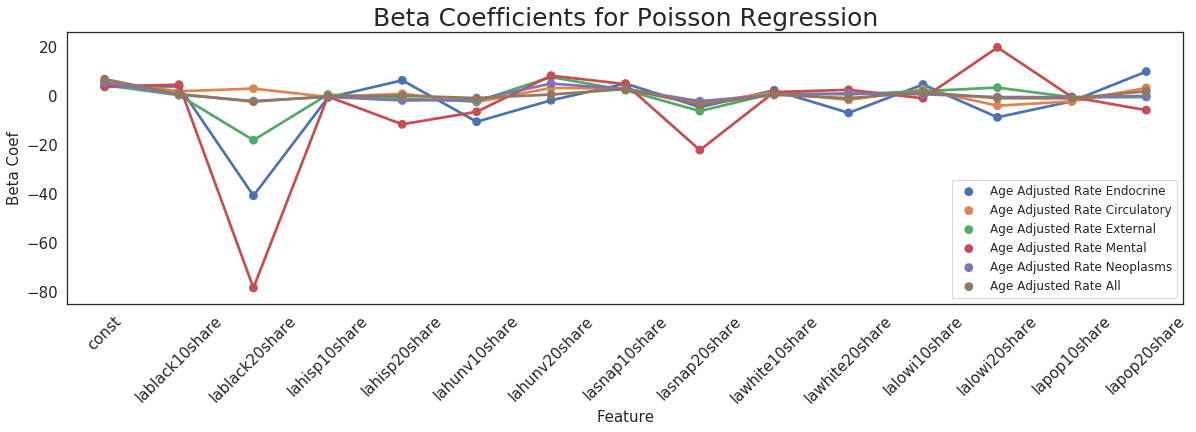

In [8]:
# Plot Beta Coefs for Poisson Regression
f, ax = plt.subplots(figsize=(20, 5))
sns.pointplot(x = 'Feature', y = 'coef', data = major_diseases, hue = 'Target')
plt.xticks(rotation = 45, fontsize = 15)
plt.xlabel('Feature', fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Beta Coef', fontsize = 15)
plt.legend(fontsize = 12)
sns.set_color_codes("dark")
plt.title('Beta Coefficients for Poisson Regression', fontsize = 25);

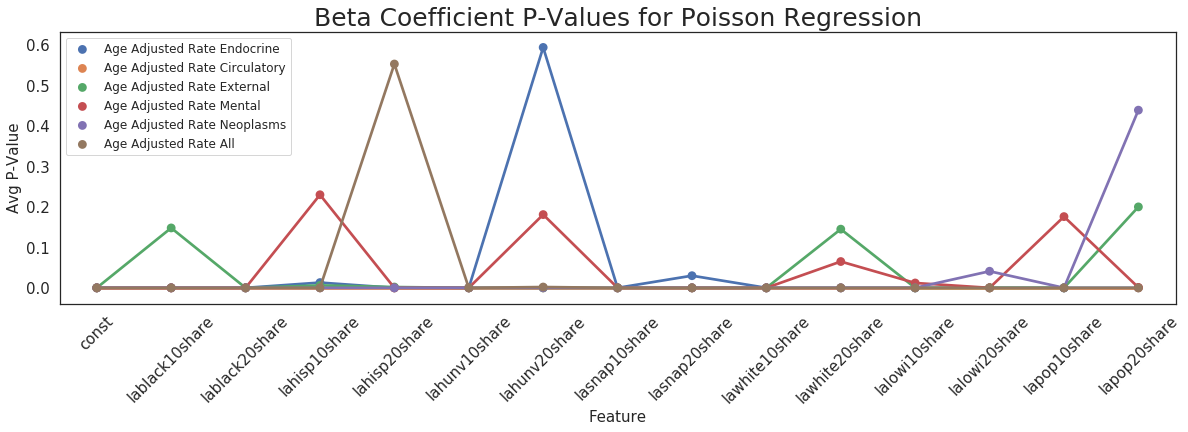

In [9]:
# Plot Beta Coef p-values for Poisson Regression
f, ax = plt.subplots(figsize=(20, 5))
sns.pointplot(x = 'Feature', y = ' P>|z|  ', data = major_diseases, hue = 'Target')
plt.xticks(rotation = 45, fontsize = 15)
plt.xlabel('Feature', fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Avg P-Value', fontsize = 15)
plt.legend(fontsize = 12)
sns.set_color_codes("dark")
plt.title('Beta Coefficient P-Values for Poisson Regression', fontsize = 25);

No handles with labels found to put in legend.


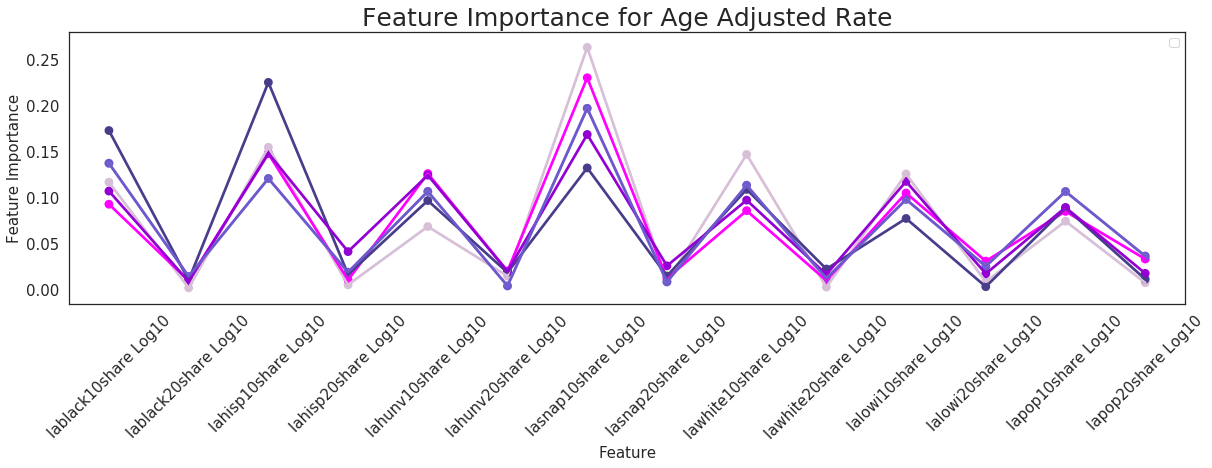

In [10]:
# Plot random forest feature importance
f, ax = plt.subplots(figsize=(20,5))
sns.set_color_codes("dark")
sns.pointplot(x = rf_feature_importance.index, label = 'Feature Importance - Endocrine', 
              y = 'Feature Importance - Age Adjusted Rate Endocrine', data = rf_feature_importance, color = 'THISTLE')
sns.pointplot(x = rf_feature_importance.index, label = 'Feature Importance - Circulatory', 
              y = 'Feature Importance - Age Adjusted Rate All', data = rf_feature_importance, color = 'PLUM')
sns.pointplot(x = rf_feature_importance.index, label = 'Feature Importance - External', 
              y = 'Feature Importance - Age Adjusted Rate External', data = rf_feature_importance, color = 'FUCHSIA')
sns.pointplot(x = rf_feature_importance.index, label = 'Feature Importance - Mental', 
              y = 'Feature Importance - Age Adjusted Rate Mental', data = rf_feature_importance, color = 'DARKSLATEBLUE')
sns.pointplot(x = rf_feature_importance.index, label = 'Feature Importance - Neoplasms', 
              y = 'Feature Importance - Age Adjusted Rate Neoplasms', data = rf_feature_importance, color = 'DARKVIOLET')
sns.pointplot(x = rf_feature_importance.index, label = 'Feature Importance - All', 
              y = 'Feature Importance - Age Adjusted Rate All', data = rf_feature_importance, color = 'SLATEBLUE')
plt.xticks(rotation = 45, fontsize = 15)
plt.xlabel('Feature', fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Feature Importance', fontsize = 15)
plt.title('Feature Importance for Age Adjusted Rate', fontsize = 25)
plt.legend(fontsize = 12)
plt.show();

In [13]:
rf_score.head()

Index,MAE Test,MAE Train,R^2 Test,R^2 Train,Avg R^2,Target
Random Forest - Age Adjusted Rate Endocrine,-11.505333,-7.486275,0.514422,0.915200,0.714811,Endocrine
Random Forest - Age Adjusted Rate Obesity,-0.941022,-0.685761,0.210734,0.688249,0.449492,Obesity
Random Forest - Age Adjusted Rate Metabolic,-2.909557,-1.871114,0.555259,0.704866,0.630062,Metabolic
Random Forest - Age Adjusted Rate Diabetes,-8.955051,-5.431739,0.562399,0.936767,0.749583,Diabetes
Random Forest - Age Adjusted Rate Circulatory,-47.451204,-29.984957,0.545401,0.908335,0.726868,Circulatory


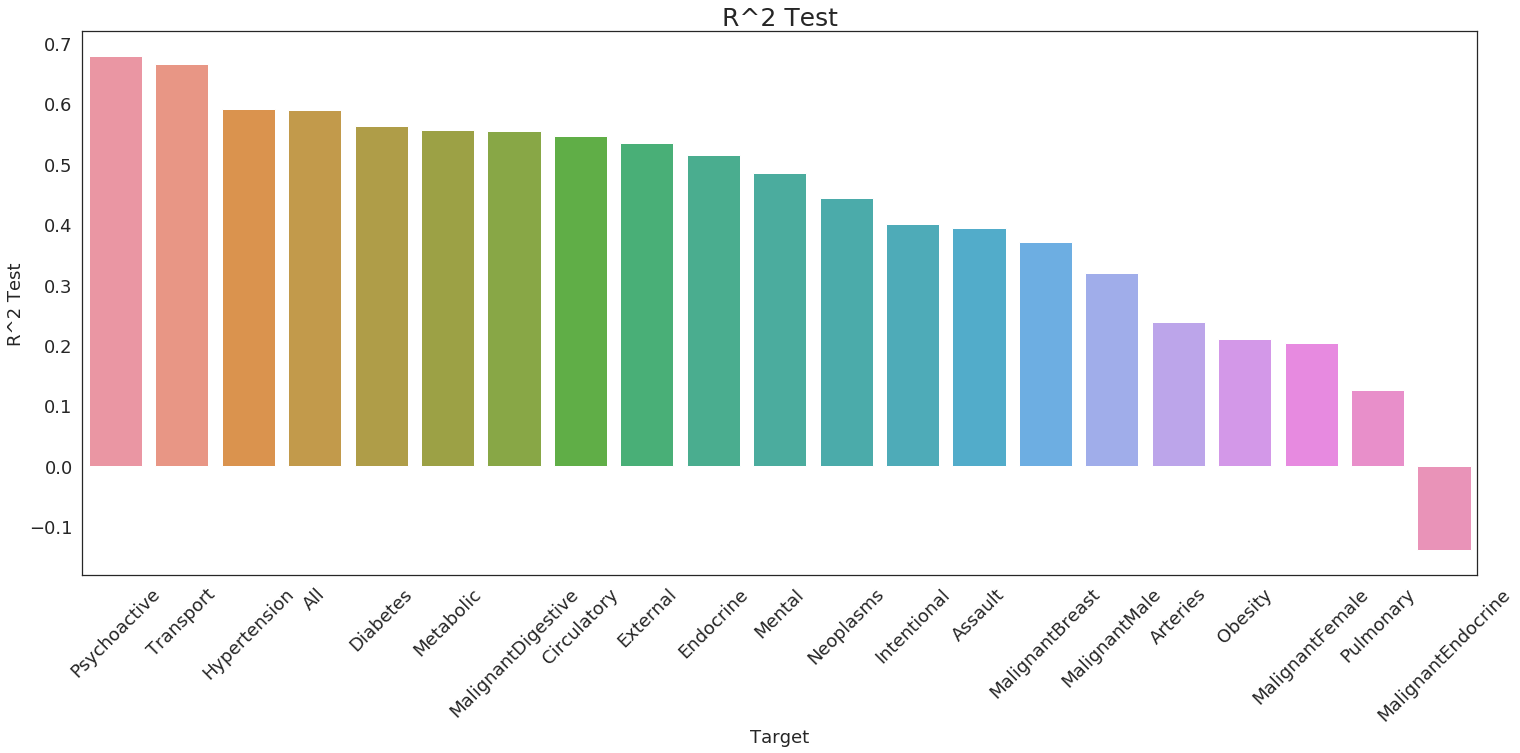

In [14]:
# Plot R^2 for Random Forest
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x = 'Target', y = 'R^2 Test', data = rf_score.sort_values('R^2 Test', ascending=False), orient = 'v')
plt.xticks(rotation = 45, fontsize = 18)
plt.xlabel('Target', fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('R^2 Test', fontsize = 18)
plt.title('R^2 Test', fontsize = 25);

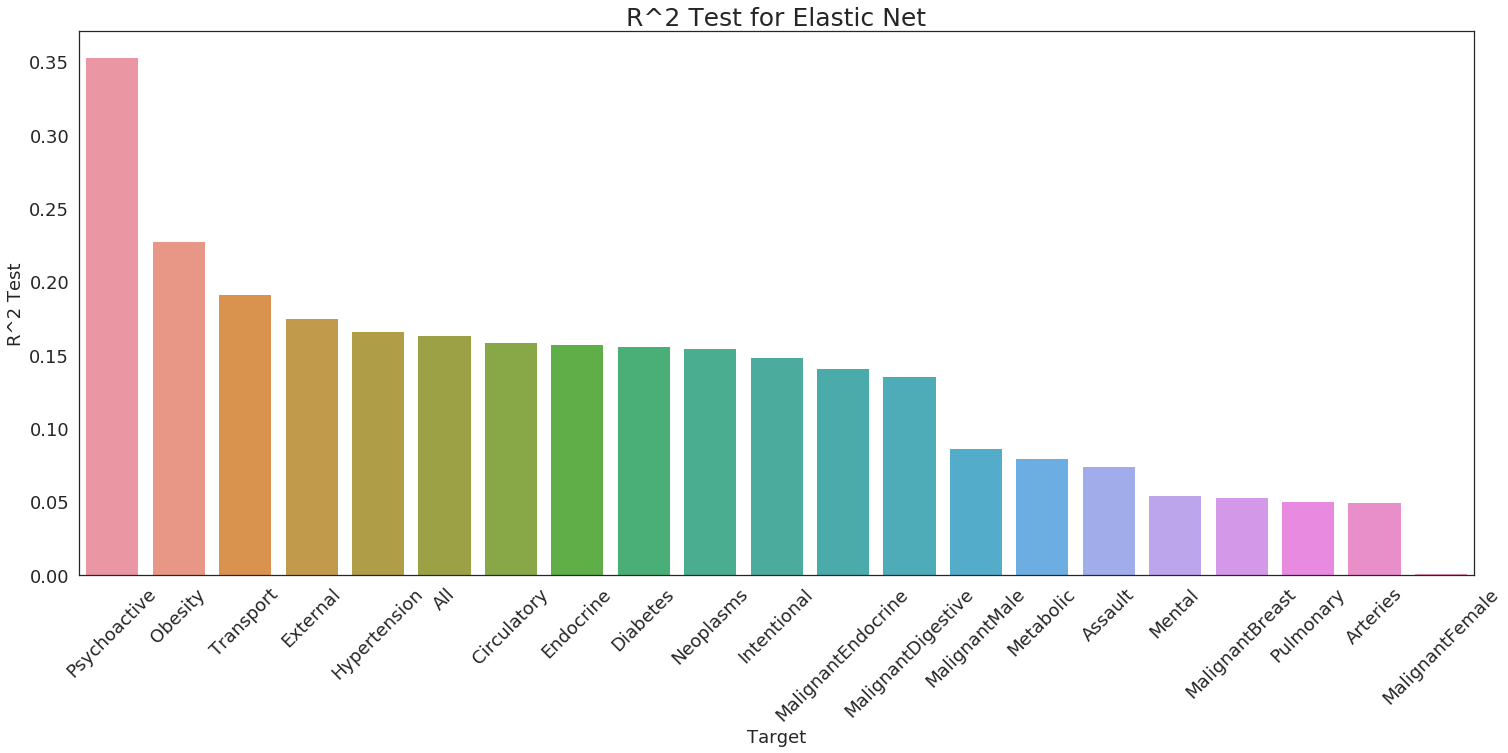

In [15]:
# Plot R^2 for ElasticNet
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x = 'Target', y = 'R^2 Test', data = enet.sort_values('R^2 Test', ascending=False), orient = 'v')
plt.xticks(rotation = 45, fontsize = 18)
plt.xlabel('Target', fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('R^2 Test', fontsize = 18)
plt.title('R^2 Test for Elastic Net', fontsize = 25);

In [21]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
df.head().T

,0,1,2,3,4
County Code,1001,1003,1005,1007,1009
STATE_ABBR,AL,AL,AL,AL,AL
AGE17,14613,41898,6015,5201,14106
AGE65,6546,30568,3909,2906,8439
E_CROWD,260,1387,188,90,567
E_LIMENG,229,2362,451,169,1607
E_MOBILE,4616,14464,3602,2666,5278
E_MUNIT,389,15052,131,148,128
E_NOHSDIP,4970,15103,5312,3839,9651
E_NOVEH,1067,2305,1064,406,707


In [22]:
df['LAPOP05_10'].sum()

149270330.41029832

In [23]:
df['LAPOP1_10'].sum()

67339493.99879259

In [24]:
df['LAPOP1_20'].sum()

62842465.989905275